In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data
data = pd.read_csv('F:/AAA_CleanOrFindAPlace/PS_20174392719_1491204439457_log.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [5]:
# Check for missing values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# Check for duplicate values
data.duplicated().sum()

0

In [7]:
data.head(1000)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,PAYMENT,2167.26,C732597634,13669.0,11501.74,M832432849,0.0,0.0,0,0
996,1,PAYMENT,9738.95,C2031927175,289748.0,280009.05,M176041373,0.0,0.0,0,0
997,1,PAYMENT,3396.25,C1967617997,18524.0,15127.75,M726843606,0.0,0.0,0,0
998,1,PAYMENT,6780.78,C925803196,52640.0,45859.22,M1288135425,0.0,0.0,0,0


In [8]:
# For each column in the dataset, display the number of unique values
for column in data.columns:
    print(column, data[column].nunique())

step 743
type 5
amount 5316900
nameOrig 6353307
oldbalanceOrg 1845844
newbalanceOrig 2682586
nameDest 2722362
oldbalanceDest 3614697
newbalanceDest 3555499
isFraud 2
isFlaggedFraud 2


In [9]:
# Drop monotonic columns
data.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)

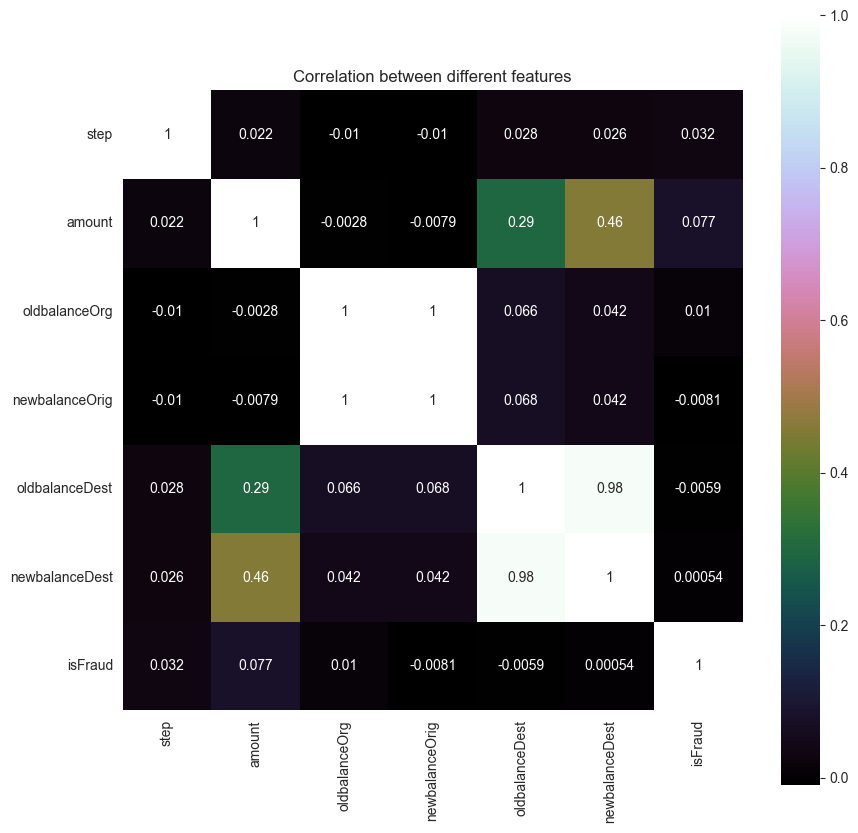

In [10]:
# Check for correlation
correlation = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.title('Correlation between different features')
plt.show()

In [11]:
# undersampling
fraud = data[data['isFraud'] == 1]
non_fraud = data[data['isFraud'] == 0]
non_fraud = non_fraud.sample(fraud.shape[0])

In [12]:
data = pd.concat([fraud, non_fraud])

In [13]:
data.shape

(16426, 8)

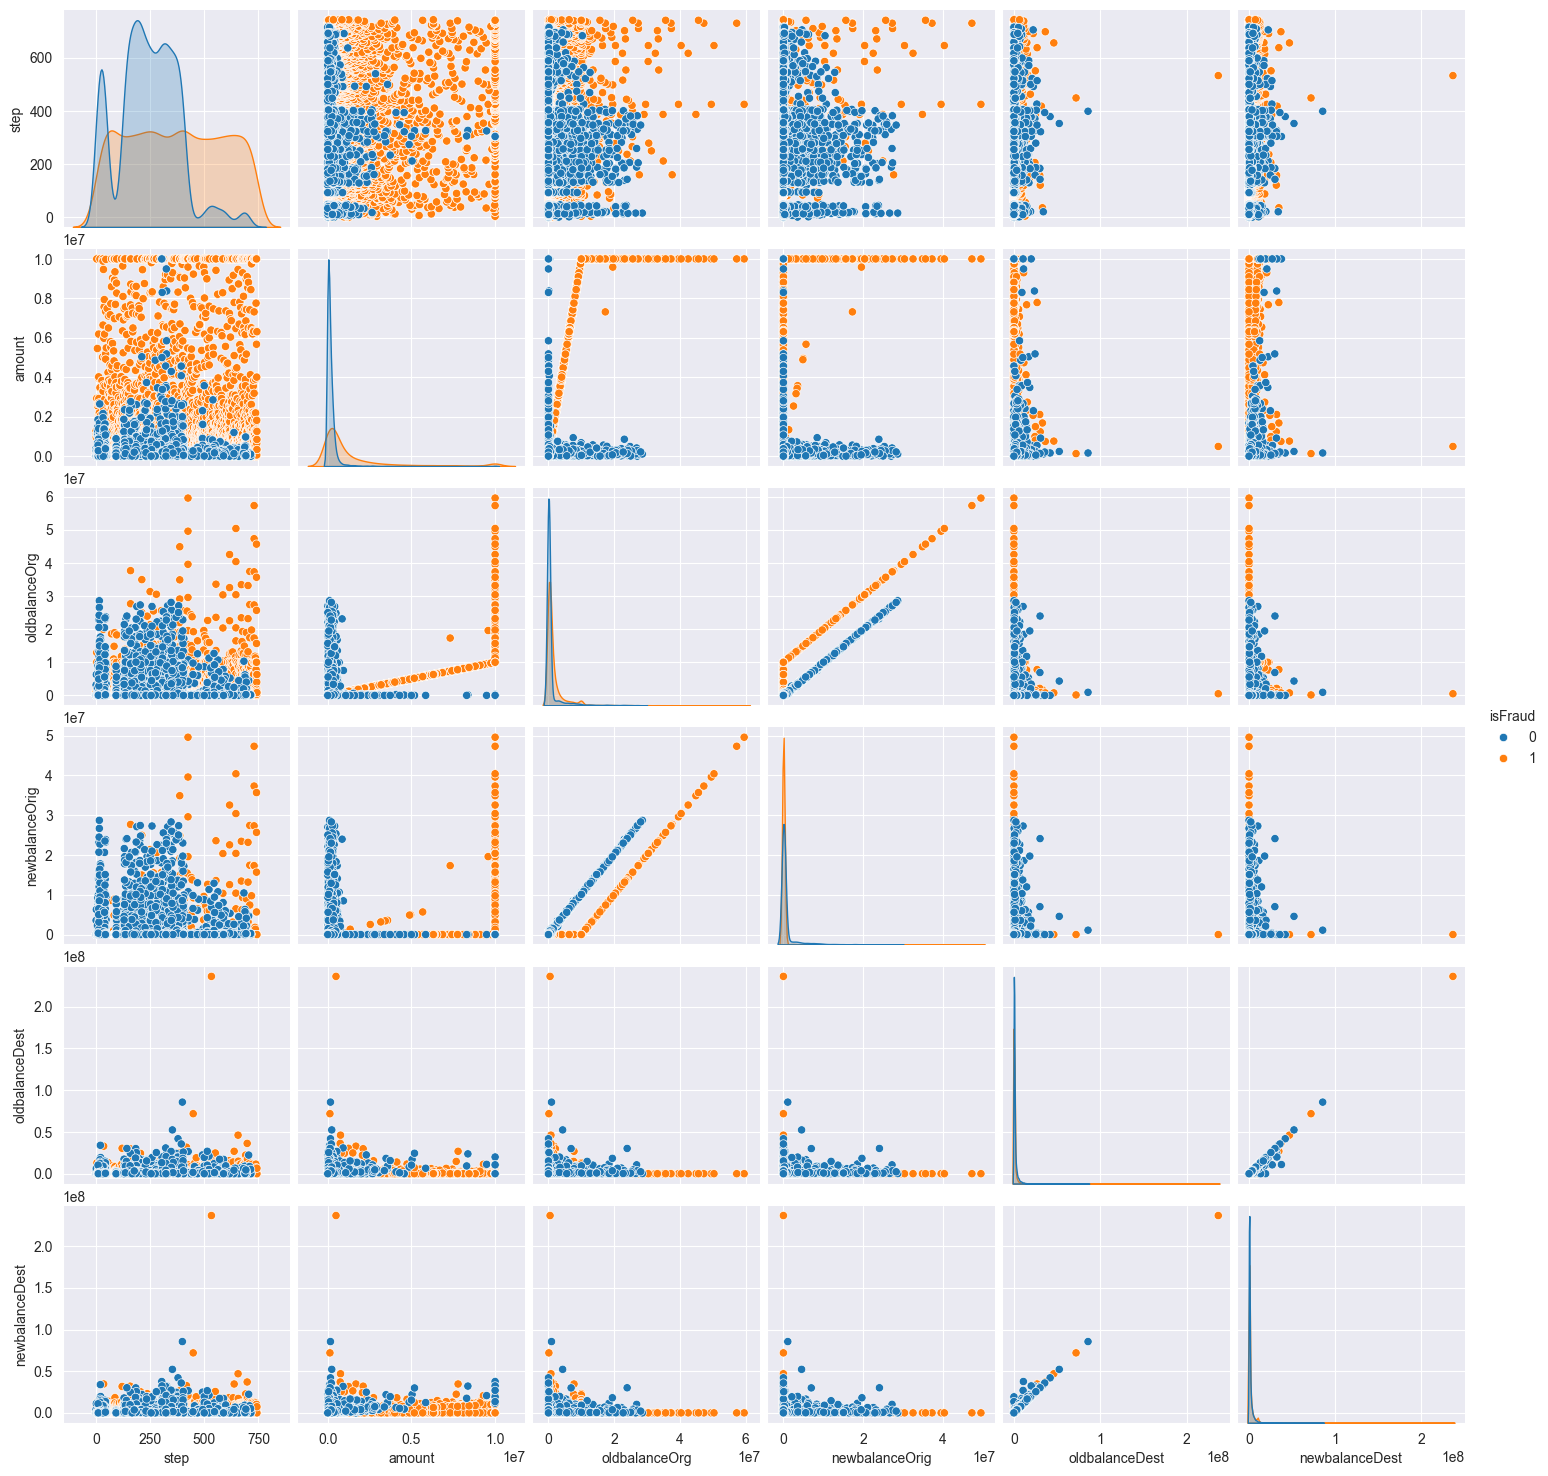

In [14]:
sns.pairplot(data, hue='isFraud')

In [15]:
# Get dummies for categorical columns
data = pd.get_dummies(data, columns=['type'])

In [16]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2,1,181.0,181.0,0.0,0.0,0.0,1,False,False,False,False,True
3,1,181.0,181.0,0.0,21182.0,0.0,1,False,True,False,False,False
251,1,2806.0,2806.0,0.0,0.0,0.0,1,False,False,False,False,True
252,1,2806.0,2806.0,0.0,26202.0,0.0,1,False,True,False,False,False
680,1,20128.0,20128.0,0.0,0.0,0.0,1,False,False,False,False,True


In [17]:
# Split the data into features and target
X = data.drop('isFraud', axis=1)
y = data['isFraud']

In [18]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

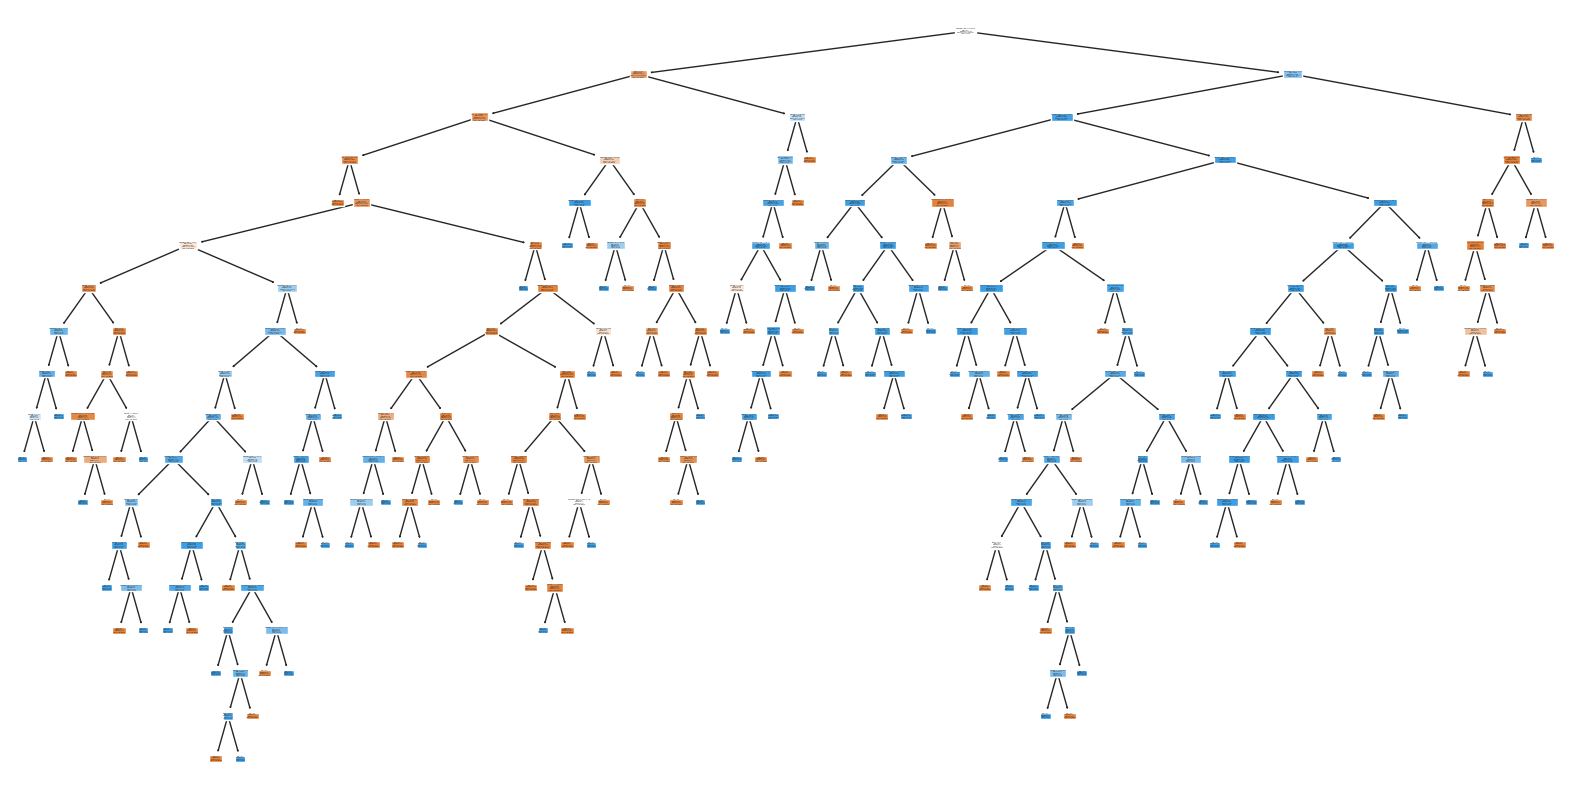

In [21]:
# Visualize the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'])
plt.show()

In [23]:
r = sklearn.tree.export_text(model, feature_names=list(X.columns))
print(r)

|--- oldbalanceOrg <= 54205.85
|   |--- step <= 410.50
|   |   |--- type_TRANSFER <= 0.50
|   |   |   |--- type_CASH_OUT <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- type_CASH_OUT >  0.50
|   |   |   |   |--- amount <= 51581.64
|   |   |   |   |   |--- oldbalanceOrg <= 1040.50
|   |   |   |   |   |   |--- amount <= 644.92
|   |   |   |   |   |   |   |--- newbalanceOrig <= 206.32
|   |   |   |   |   |   |   |   |--- oldbalanceOrg <= 31.90
|   |   |   |   |   |   |   |   |   |--- amount <= 82.54
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- amount >  82.54
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- oldbalanceOrg >  31.90
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- newbalanceOrig >  206.32
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- amount >  644.92
|   |   |   |   |   |   |   |--- step <= 21.50
|   |   |   |   |  

In [24]:
# Make predictions
y_pred = model.predict(X_test)

In [25]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9914790018259282
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1656
           1       0.99      0.99      0.99      1630

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

Confusion Matrix:
 [[1640   16]
 [  12 1618]]


# K-Means Clustering

In [44]:
from sklearn.cluster import KMeans

In [45]:
# Train the model
model = KMeans(n_clusters=2)
model.fit(X_train)

  File "C:\Users\Workspace\.virtualenvs\segundoproyecto-eF79j7xb\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=2)

In [47]:
# Make predictions
y_pred = model.predict(X_test)

In [48]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.5173463177115033
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.93      0.66      1656
           1       0.58      0.10      0.17      1630

    accuracy                           0.52      3286
   macro avg       0.55      0.51      0.41      3286
weighted avg       0.55      0.52      0.42      3286

Confusion Matrix:
 [[1542  114]
 [1472  158]]


# Multi Layer Perceptron

In [49]:
from sklearn.neural_network import MLPClassifier

In [52]:
# Train the model
model = MLPClassifier(hidden_layer_sizes=(100, 10), max_iter=1000)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 10), max_iter=1000)

In [53]:
# Make predictions
y_pred = model.predict(X_test)

In [54]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.49695678636640295
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      1656
           1       0.50      1.00      0.66      1630

    accuracy                           0.50      3286
   macro avg       0.75      0.50      0.33      3286
weighted avg       0.75      0.50      0.33      3286

Confusion Matrix:
 [[   3 1653]
 [   0 1630]]
